In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
dataset=pd.read_csv("./eir.csv")
dataset

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT
0,2016-01-09 0:18:14,9-1-2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38
1,2016-01-09 2:28:34,9-1-2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27
2,2016-01-09 4:00:34,9-1-2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44
3,2016-01-09 10:26:27,9-1-2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51
4,2016-01-09 11:37:59,9-1-2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45
...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8-1-2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27
9996,2017-01-08 22:36:21,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71
9997,2017-01-08 22:54:55,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68
9998,2017-01-08 23:25:27,8-1-2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32


In [211]:
from datetime import datetime, time

In [212]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CREATED_DATE             10000 non-null  object 
 1   CREATED_DATE minus Hour  10000 non-null  object 
 2   USER_ID                  10000 non-null  object 
 3   TRANSACTION_ID           10000 non-null  object 
 4   TYPE                     10000 non-null  object 
 5   CURRENCY                 10000 non-null  object 
 6   AMOUNT                   10000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [213]:
dataset.isnull().sum()

CREATED_DATE               0
CREATED_DATE minus Hour    0
USER_ID                    0
TRANSACTION_ID             0
TYPE                       0
CURRENCY                   0
AMOUNT                     0
dtype: int64

In [214]:
dataset[["date","time"]]=dataset['CREATED_DATE'].str.split(" ", expand=True)

In [215]:
dataset

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT,date,time
0,2016-01-09 0:18:14,9-1-2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,2016-01-09,0:18:14
1,2016-01-09 2:28:34,9-1-2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,2016-01-09,2:28:34
2,2016-01-09 4:00:34,9-1-2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,2016-01-09,4:00:34
3,2016-01-09 10:26:27,9-1-2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,2016-01-09,10:26:27
4,2016-01-09 11:37:59,9-1-2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45,2016-01-09,11:37:59
...,...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8-1-2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27,2017-01-08,22:07:16
9996,2017-01-08 22:36:21,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71,2017-01-08,22:36:21
9997,2017-01-08 22:54:55,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68,2017-01-08,22:54:55
9998,2017-01-08 23:25:27,8-1-2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32,2017-01-08,23:25:27


In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CREATED_DATE             10000 non-null  object 
 1   CREATED_DATE minus Hour  10000 non-null  object 
 2   USER_ID                  10000 non-null  object 
 3   TRANSACTION_ID           10000 non-null  object 
 4   TYPE                     10000 non-null  object 
 5   CURRENCY                 10000 non-null  object 
 6   AMOUNT                   10000 non-null  float64
 7   date                     10000 non-null  object 
 8   time                     10000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 703.2+ KB


In [217]:
dataset

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT,date,time
0,2016-01-09 0:18:14,9-1-2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,2016-01-09,0:18:14
1,2016-01-09 2:28:34,9-1-2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,2016-01-09,2:28:34
2,2016-01-09 4:00:34,9-1-2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,2016-01-09,4:00:34
3,2016-01-09 10:26:27,9-1-2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,2016-01-09,10:26:27
4,2016-01-09 11:37:59,9-1-2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45,2016-01-09,11:37:59
...,...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8-1-2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27,2017-01-08,22:07:16
9996,2017-01-08 22:36:21,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71,2017-01-08,22:36:21
9997,2017-01-08 22:54:55,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68,2017-01-08,22:54:55
9998,2017-01-08 23:25:27,8-1-2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32,2017-01-08,23:25:27


In [218]:
del dataset['date']

In [219]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CREATED_DATE             10000 non-null  object 
 1   CREATED_DATE minus Hour  10000 non-null  object 
 2   USER_ID                  10000 non-null  object 
 3   TRANSACTION_ID           10000 non-null  object 
 4   TYPE                     10000 non-null  object 
 5   CURRENCY                 10000 non-null  object 
 6   AMOUNT                   10000 non-null  float64
 7   time                     10000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [220]:
dict = {'CREATED_DATE minus Hour': 'Date',
        'USER_ID': 'User_ID',
        'TRANSACTION_ID ': 'Transaction_ID',
        'TYPE':'Type',
        'CURRENCY': 'Currency',
        'AMOUNT': 'Amount',
        'time':'Time'
        }

In [221]:
dataset.rename(columns=dict, inplace=True)

In [222]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CREATED_DATE    10000 non-null  object 
 1   Date            10000 non-null  object 
 2   User_ID         10000 non-null  object 
 3   TRANSACTION_ID  10000 non-null  object 
 4   Type            10000 non-null  object 
 5   Currency        10000 non-null  object 
 6   Amount          10000 non-null  float64
 7   Time            10000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [223]:
dataset

,CREATED_DATE,Date,User_ID,TRANSACTION_ID,Type,Currency,Amount,Time
0,2016-01-09 0:18:14,9-1-2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,0:18:14
1,2016-01-09 2:28:34,9-1-2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,2:28:34
2,2016-01-09 4:00:34,9-1-2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,4:00:34
3,2016-01-09 10:26:27,9-1-2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,10:26:27
4,2016-01-09 11:37:59,9-1-2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45,11:37:59
...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8-1-2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27,22:07:16
9996,2017-01-08 22:36:21,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71,22:36:21
9997,2017-01-08 22:54:55,8-1-2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68,22:54:55
9998,2017-01-08 23:25:27,8-1-2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32,23:25:27


In [224]:
currency_counts=dataset['Currency'].value_counts()
currency_counts

Currency
GBP    5149
EUR    4851
Name: count, dtype: int64

In [225]:
date_counts=dataset['Date'].value_counts()
date_counts.nsmallest(10)

Date
6-2-2016     2
24-2-2016    3
12-1-2016    4
11-1-2016    4
21-2-2016    5
9-2-2016     5
28-1-2016    6
23-1-2016    6
27-2-2016    6
18-2-2016    7
Name: count, dtype: int64

In [226]:
dataset["Date"] = pd.to_datetime(dataset["Date"],format='mixed')

In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CREATED_DATE    10000 non-null  object        
 1   Date            10000 non-null  datetime64[ns]
 2   User_ID         10000 non-null  object        
 3   TRANSACTION_ID  10000 non-null  object        
 4   Type            10000 non-null  object        
 5   Currency        10000 non-null  object        
 6   Amount          10000 non-null  float64       
 7   Time            10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 625.1+ KB


In [228]:
dataset

,CREATED_DATE,Date,User_ID,TRANSACTION_ID,Type,Currency,Amount,Time
0,2016-01-09 0:18:14,2016-09-01,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,0:18:14
1,2016-01-09 2:28:34,2016-09-01,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,2:28:34
2,2016-01-09 4:00:34,2016-09-01,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,4:00:34
3,2016-01-09 10:26:27,2016-09-01,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,10:26:27
4,2016-01-09 11:37:59,2016-09-01,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45,11:37:59
...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,2017-08-01,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27,22:07:16
9996,2017-01-08 22:36:21,2017-08-01,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71,22:36:21
9997,2017-01-08 22:54:55,2017-08-01,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68,22:54:55
9998,2017-01-08 23:25:27,2017-08-01,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32,23:25:27


In [229]:
date_counts=dataset['Date'].value_counts()
date_counts.nsmallest(10)

Date
2016-06-02    2
2016-02-24    3
2016-12-01    4
2016-11-01    4
2016-02-21    5
2016-09-02    5
2016-01-28    6
2016-01-23    6
2016-02-27    6
2016-02-18    7
Name: count, dtype: int64

In [230]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset['Time'] = [time.time() for time in dataset['Time']]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4224\627217905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Time'] = pd.to_datetime(dataset['Time'])


In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CREATED_DATE    10000 non-null  object        
 1   Date            10000 non-null  datetime64[ns]
 2   User_ID         10000 non-null  object        
 3   TRANSACTION_ID  10000 non-null  object        
 4   Type            10000 non-null  object        
 5   Currency        10000 non-null  object        
 6   Amount          10000 non-null  float64       
 7   Time            10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 625.1+ KB


In [232]:
time_counts=dataset['Time'].value_counts()
time_counts

Time
11:43:36    4
13:15:11    4
12:34:10    4
14:29:29    3
11:45:32    3
           ..
15:35:07    1
15:21:43    1
15:04:42    1
14:48:49    1
23:50:18    1
Name: count, Length: 9315, dtype: int64

In [233]:
dataset.groupby(dataset['Date'].dt.year)['Amount'].sum()

Date
2016    1699000.55
2017      58681.98
Name: Amount, dtype: float64

In [234]:
dataset['Date'].max()

Timestamp('2017-08-01 00:00:00')

In [235]:
dataset['Date'].min()

Timestamp('2016-01-02 00:00:00')

In [236]:
phase = []
for x in dataset['Time']:
    if x > time(22, 0, 0) or x <= time(6, 0, 0):
        phase.append("Midnight")
    elif time(6, 0, 0) < x <= time(16, 0, 0):
        phase.append("Daytime")
    else:
        phase.append("Eveningtime")
phase

['Midnight',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Eveningtime',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Eveningtime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Daytime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Eveningtime',
 'Eveningtime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Midnight',
 'Daytime',
 'Daytime',
 'Daytime',
 'Daytime',
 'Eveningtime',
 'Midnight',
 

In [237]:
dataset.insert(5,"Phase",phase)

In [238]:
dataset

,CREATED_DATE,Date,User_ID,TRANSACTION_ID,Type,Phase,Currency,Amount,Time
0,2016-01-09 0:18:14,2016-09-01,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,Midnight,EUR,177.38,00:18:14
1,2016-01-09 2:28:34,2016-09-01,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,Midnight,EUR,310.27,02:28:34
2,2016-01-09 4:00:34,2016-09-01,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,Midnight,EUR,96.44,04:00:34
3,2016-01-09 10:26:27,2016-09-01,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,Daytime,EUR,288.51,10:26:27
4,2016-01-09 11:37:59,2016-09-01,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,Daytime,GBP,88.45,11:37:59
...,...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,2017-08-01,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,Midnight,GBP,175.27,22:07:16
9996,2017-01-08 22:36:21,2017-08-01,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,Midnight,GBP,108.71,22:36:21
9997,2017-01-08 22:54:55,2017-08-01,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,Midnight,GBP,285.68,22:54:55
9998,2017-01-08 23:25:27,2017-08-01,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,Midnight,GBP,17.32,23:25:27


In [239]:
grouped = dataset.groupby('Phase').agg({'Amount': 'sum'})
grouped

,Amount
Phase,
Daytime,894369.66
Eveningtime,562199.56
Midnight,301113.31


Text(0.5, 1.0, 'Phase vs Amount Spent')

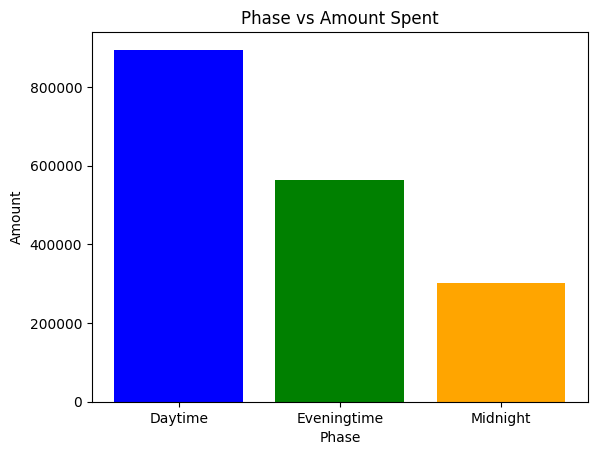

In [240]:
grouped = dataset.groupby('Phase')['Amount'].sum()
plt.bar(grouped.index, grouped.values, color=['blue', 'green', 'orange'])
plt.xlabel('Phase')
plt.ylabel('Amount')
plt.title('Phase vs Amount Spent')

In [241]:
grouped = dataset.groupby('Type').agg({'Amount': 'sum'})
grouped

,Amount
Type,
ATM,411698.70
BANK_TRANSFER,418864.83
CARD_PAYMENT,414852.35
P2P_TRANSFER,101981.34
TOPUP,410285.31


([0, 1, 2, 3, 4],
 [Text(0, 0, 'ATM'),
  Text(1, 0, 'BANK_TRANSFER'),
  Text(2, 0, 'CARD_PAYMENT'),
  Text(3, 0, 'P2P_TRANSFER'),
  Text(4, 0, 'TOPUP')])

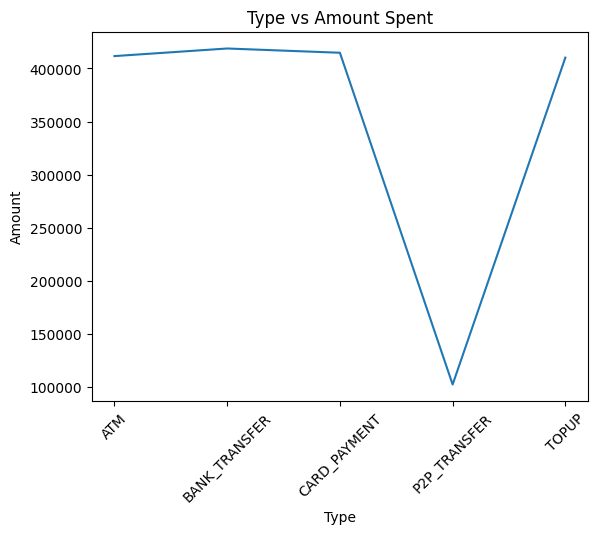

In [242]:
grouped = dataset.groupby('Type')['Amount'].sum()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Type')
plt.ylabel('Amount')
plt.title('Type vs Amount Spent')
plt.xticks(rotation=45)

In [243]:
total=dataset['Amount'].sum()
grouped=(((dataset.groupby('Type')['Amount'].sum())/total)*100)
grouped

Type
ATM              23.422813
BANK_TRANSFER    23.830517
CARD_PAYMENT     23.602234
P2P_TRANSFER      5.802034
TOPUP            23.342401
Name: Amount, dtype: float64

In [244]:
user_total_transaction = dataset.groupby('User_ID')['Amount'].sum()
sorted_users = user_total_transaction.sort_values(ascending=False)
total_value = sorted_users.sum()
top_users_cutoff = int(0.03 * len(sorted_users))
cumulative_value = 0
for i in range(top_users_cutoff):
    cumulative_value += sorted_users[i]

# (cumulative_value/total_value)*100
total_value

1757682.5299999998

Text(0.5, 1.0, 'Distribution of Users by Transaction Value')

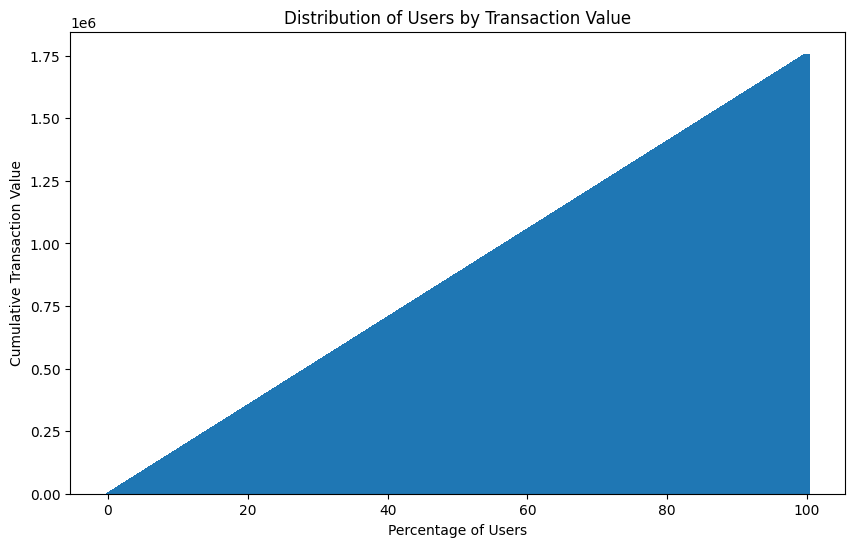

In [245]:
dataset['Cumulative_Value'] = dataset['Amount'].cumsum()
dataset['Percentage'] = (dataset['Cumulative_Value'] / dataset['Amount'].sum()) * 100
sorted_dataset = dataset.sort_values(by='Cumulative_Value', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sorted_dataset['Percentage'], sorted_dataset['Cumulative_Value'])
plt.xlabel('Percentage of Users')
plt.ylabel('Cumulative Transaction Value')
plt.title('Distribution of Users by Transaction Value')

In [246]:
d=dataset.groupby('Currency')['Amount'].sum()
d

Currency
EUR    852363.35
GBP    905319.18
Name: Amount, dtype: float64

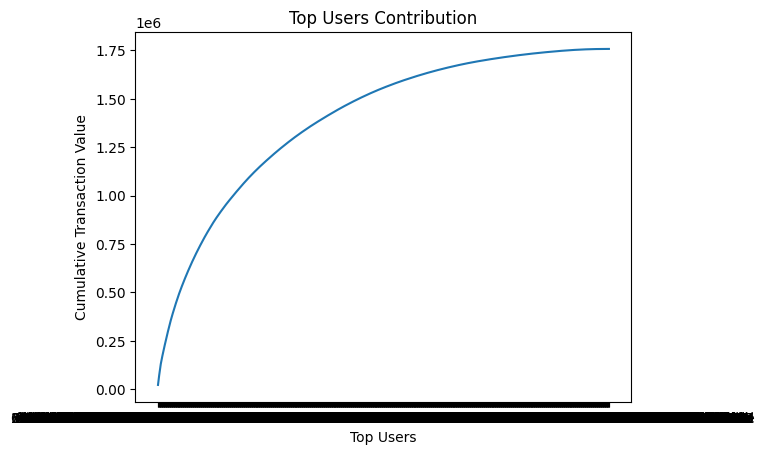

In [247]:
top_users = dataset.groupby('User_ID')['Amount'].sum().sort_values(ascending=False)

total_users = len(dataset)
percent = int(1 * total_users)
top_users_cumulative = top_users.cumsum().head(percent)

plt.plot(top_users_cumulative)
plt.xlabel('Top Users')
plt.ylabel('Cumulative Transaction Value')
plt.title('Top Users Contribution')
plt.show()

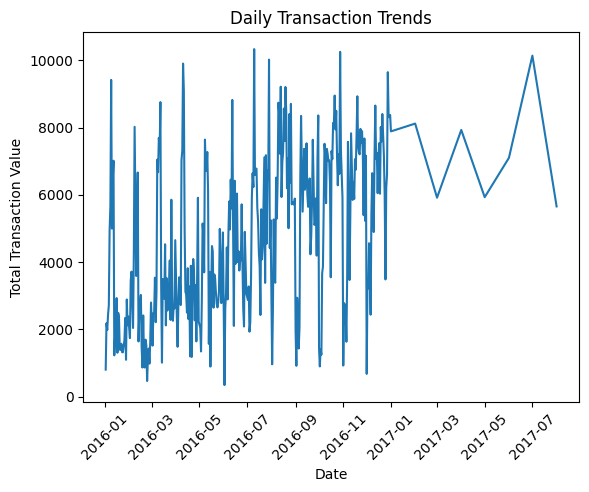

In [248]:
daily_transaction_data = dataset.groupby('Date').agg({'Amount': 'sum', 'User_ID': 'count'})

plt.plot(daily_transaction_data.index, daily_transaction_data['Amount'])
plt.xlabel('Date')
plt.ylabel('Total Transaction Value')
plt.title('Daily Transaction Trends')
plt.xticks(rotation=45)
plt.show()

In [249]:
currency_transaction_amount = pd.crosstab(dataset['Currency'], columns=dataset['Type'], values=dataset['Amount'], aggfunc='sum')
currency_transaction_amount

Type,ATM,BANK_TRANSFER,CARD_PAYMENT,P2P_TRANSFER,TOPUP
Currency,,,,,
EUR,213140.45,205127.11,210115.77,19905.82,204074.20
GBP,198558.25,213737.72,204736.58,82075.52,206211.11


In [250]:
currency_transaction_type=pd.crosstab(dataset['Currency'], dataset['Type'])
currency_transaction_type

Type,ATM,BANK_TRANSFER,CARD_PAYMENT,P2P_TRANSFER,TOPUP
Currency,,,,,
EUR,1209,1181,1147,105,1209
GBP,1148,1190,1178,469,1164
